In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. 데이터 로드

In [261]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [262]:
# dataset 확인: 결측치 항목 여부 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [263]:
# 필요한 컬럼 추리기
df.drop(columns=['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,994.7052


In [264]:
# 결측치 확인: Item_Weight          
df.isnull().sum()

Item_Identifier         0
Item_Weight          1463
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

In [265]:
# Item_Type별 Item_Weight 추출
#   평균값의 차이가 크지 않은 것으로 보아 전체 항목의 평균값을 NaN값에 기재
df.groupby('Item_Type')[['Item_Weight']].mean()

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [266]:
item_weight_mean = df.Item_Weight.mean()

In [267]:
item_weight = df.Item_Weight.fillna(item_weight_mean, inplace=True)
item_weight

#### 2. 시각화를 통한 각 feature별 target과 상관관계 비교

- Item_Visibility vs. Item_Outlet_Sales

In [268]:
weight, bias = np.polyfit(df.Item_Weight, df.Item_Outlet_Sales, 1)
weight, bias

(4.663865338991059, 2121.3225878596954)

In [269]:
xs = np.array([0., 0.35])
ys = xs * weight + bias
ys

array([2121.32258786, 2122.95494073])

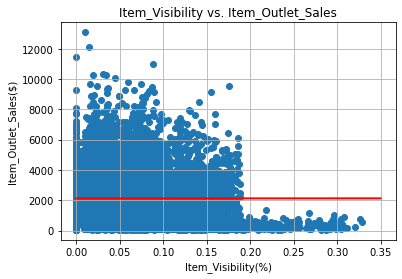

In [270]:
# 시각화
# 기울기가 0에 가까움
plt.scatter(df.Item_Visibility, df.Item_Outlet_Sales)
plt.plot(xs, ys, lw=2, color='r')
plt.grid()
plt.xlabel('Item_Visibility(%)')
plt.ylabel('Item_Outlet_Sales($)')
plt.title('Item_Visibility vs. Item_Outlet_Sales')
plt.show()

- Item_MRP vs. Item_Outlet_Sales

In [271]:
weight, bias = np.polyfit(df.Item_MRP, df.Item_Outlet_Sales, 1)

In [272]:
xs = np.array([30, 280])
ys = xs * weight + bias
ys

array([ 455.01556323, 4343.27144703])

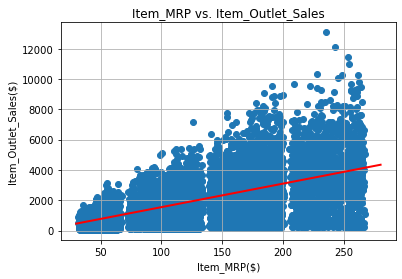

In [273]:
# 양의 상관관계: 최대 소매가격이 올라갈수록, 매장 판매금액도 증가함을 볼 수 있다. 
plt.scatter(df.Item_MRP, df.Item_Outlet_Sales)
plt.plot(xs, ys, lw=2, color='r')
plt.grid()
plt.xlabel('Item_MRP($)')
plt.ylabel('Item_Outlet_Sales($)')
plt.title('Item_MRP vs. Item_Outlet_Sales')
plt.show()

- Item_Weight vs. df.Item_Outlet_Sales


In [274]:
weight, bias = np.polyfit(df.Item_Weight, df.Item_Outlet_Sales, 1)

In [275]:
xs = np.array([3., 23])
ys = xs * weight + bias
ys

array([2135.31418388, 2228.59149066])

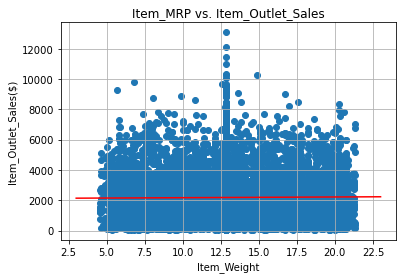

In [276]:
# 기울기가 0에 가까움
plt.scatter(df.Item_Weight, df.Item_Outlet_Sales)
plt.plot(xs, ys, color='r')
plt.grid()
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales($)')
plt.title('Item_MRP vs. Item_Outlet_Sales')
plt.show()

#### 3. 선형회귀 모델을 이용하여 상관관계 정도 확인: 훈련, 테스트
    - 최대 소매가, 매장 점유율, 제품 무게순으로 상관관계 비중 확인

In [277]:
# 매장 점유율과 판매금액의 상관관계
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.Item_Visibility.values.reshape(-1,1), 
    df.Item_Outlet_Sales.values.reshape(-1,1), 
    test_size=0.1, random_state=2021
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7670, 1), (853, 1), (7670, 1), (853, 1))

In [278]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.016302341439267676

In [279]:
# 최대 소매가와 판매금액의 상관관계
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.Item_MRP.values.reshape(-1,1), 
    df.Item_Outlet_Sales.values.reshape(-1,1), 
    test_size=0.1, random_state=2021
)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((7670, 1), (853, 1), (7670, 1), (853, 1))

In [280]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)
lr2.score(X_test2, y_test2)

0.3577367806660219

In [281]:
# 제품 무게와 판매금액의 상관관계
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    df.Item_Weight.values.reshape(-1,1), 
    df.Item_Outlet_Sales.values.reshape(-1,1), 
    test_size=0.1, random_state=2021
)

X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((7670, 1), (853, 1), (7670, 1), (853, 1))

In [282]:
lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)
lr3.score(X_test3, y_test3)

0.00011298023426042914